In [17]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [18]:
data=pd.read_csv("EastWestAirlines.csv")

In [19]:
data


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [20]:
def norm_fucn(i):
    x=(i-i.min())/(i.max()-i.min())
    return (x)

In [21]:
nd=norm_fucn(data.iloc[:,1:])

In [22]:
nd.head(10)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
5,0.009631,0.0,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.836749,0.0
6,0.049808,0.0,0.50,0.0,0.0,0.104223,0.290698,0.000000,0.000000,0.843019,0.0
7,0.012233,0.0,0.00,0.0,0.0,0.019910,0.046512,0.008112,0.018868,0.836267,1.0
8,0.259850,0.0,0.50,0.5,0.0,0.006648,0.500000,0.124931,0.226415,0.837473,1.0
9,0.061507,0.0,0.50,0.0,0.0,0.107803,0.325581,0.037317,0.056604,0.835423,1.0


In [23]:
#elbow curve
wcss = []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(nd)
    wcss.append(kmeans.inertia_)
   
   
    

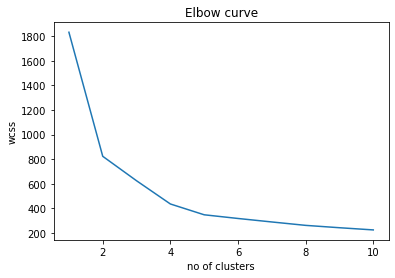

In [24]:
    plt.plot(range(1,11),wcss)
    plt.title("Elbow curve")
    plt.xlabel("no of clusters")
    plt.ylabel("wcss")
    plt.show() 
    

In [25]:
model=KMeans(n_clusters=4)
model.fit(nd)

KMeans(n_clusters=4)

In [26]:
model.labels_


array([2, 2, 2, ..., 1, 2, 2])

In [27]:
md=pd.Series(model.labels_)
data['Clust']=md

In [28]:
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,3
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,3
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2


In [32]:
#scree plot 
    TWSS = []
    

In [34]:
for j in range(i):
    wcss.append(sum(cdist(nd.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,nd.shape[1]),"euclidean")))
    TWSS.append(sum(wcss))





([<matplotlib.axis.XTick at 0x213bc10d430>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

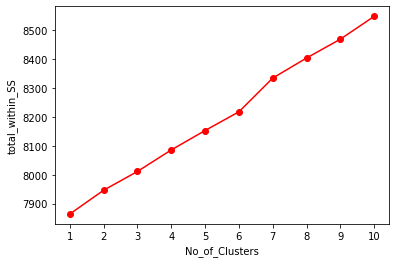

In [42]:
plt.plot(range(1,11),TWSS, 'ro-')
plt.xlabel("No_of_Clusters")
plt.ylabel("total_within_SS")
plt.xticks(range(1,11))
        

In [45]:
model=KMeans(n_clusters=5) 
model.fit(nd)



KMeans(n_clusters=5)

In [47]:
model.labels_
md=pd.Series(model.labels_)  

In [67]:
data['clust']=md
md.head()


0    0
1    0
2    0
3    0
4    1
dtype: int32

In [68]:

data = data.iloc[:,[7,0,1,2,3,4,5,6]]




In [70]:
data.iloc[:,1:7].groupby(md).mean()


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles
0,49921.633641,89.903226,1.122120,1.019585,1.001152,3467.074885
1,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178
2,33097.301357,94.131783,1.070736,1.016473,1.006783,3244.520349
3,118297.325243,73.467638,3.584142,1.001618,1.022654,31384.393204
4,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245
